In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import scanpy as sc

# Plot confusion matrix

In [2]:
def plot_cm(cm, celltype_labels, output=None):
    annot_matrix = np.where(
        cm > 0.5,
        np.char.add(np.round(cm * 100, 1).astype(str), '%'), 
        ''
    )

    plt.figure(figsize=(6, 6))
    ax = sns.heatmap(cm, 
                annot=annot_matrix,
                annot_kws={
                    'size': 11,             
                    # 'color': 'black',      
                    # 'weight': 'bold',      
                },
                fmt='', 
                cmap='Blues',
                xticklabels=False, 
                yticklabels=celltype_labels,
                cbar=False,
                mask=cm == 0,
                )
    ax.tick_params(
        left=False,         
        bottom=False,       
        labelsize=15
    )
    # plt.title('Normalized Confusion Matrix (Recall)')
    # plt.ylabel('True Label')
    # plt.xlabel('Predicted Label')
    if output is not None:
        plt.savefig(output, bbox_inches='tight')

In [3]:
celltype_labels = pickle.load(open('celltype_labels.pkl', 'rb'))

In [4]:
cm_dict = pickle.load(open('cm_dict_4M.pkl', 'rb'))
cm = cm_dict[20]
# cm = pickle.load(open('cm_list_scf.pkl', 'rb'))

cm = np.median(cm,axis=0)

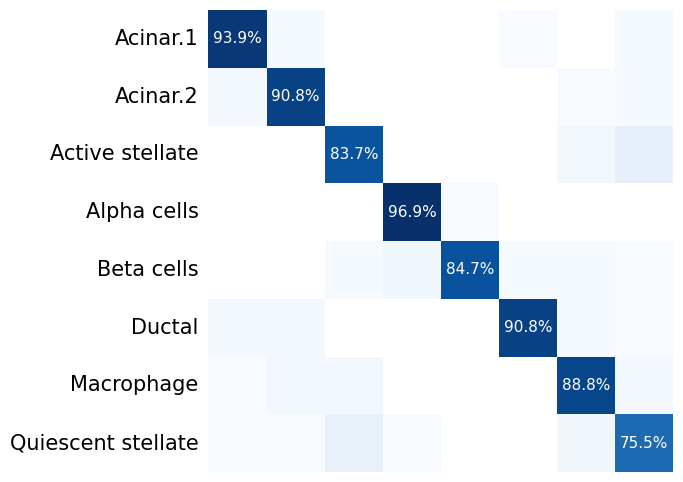

In [5]:
plot_cm(cm, celltype_labels, 'cm_cv_4M-niche20.pdf')

# Plot CV accuracy

In [6]:
accuracy_dict_4M = pickle.load(open('cv_accuracy_dict_4M.pkl', 'rb'))
accuracy_dict_2M = pickle.load(open('cv_accuracy_dict_2M.pkl', 'rb'))
accuracy_list_scf = pickle.load(open('cv_accuracy_list_scf.pkl', 'rb'))

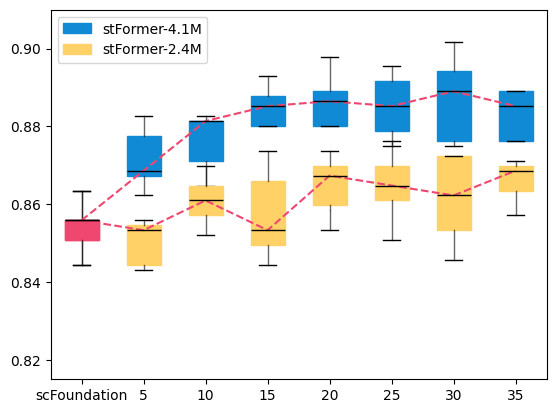

In [7]:
accuracy_keys_4M = ['scFoundation']+list(accuracy_dict_4M.keys())
accuracy_values_4M = [accuracy_list_scf]+list(accuracy_dict_4M.values())

accuracy_keys_2M = ['scFoundation']+list(accuracy_dict_2M.keys())
accuracy_values_2M = [accuracy_list_scf]+list(accuracy_dict_2M.values())

fig, ax = plt.subplots()
f_4M = ax.boxplot(accuracy_values_4M, widths=0.55, label='4M', whiskerprops=dict(alpha=0.6), medianprops={'color':'black'}, patch_artist=True, flierprops={'marker': '+', 'markersize':0.1})
f_2M = ax.boxplot(accuracy_values_2M, widths=0.55, label='2M', whiskerprops=dict(alpha=0.6), medianprops={'color':'black'}, patch_artist=True, flierprops={'marker': '+', 'markersize':0.1})

for i, box in enumerate(f_4M['boxes']):
    if i==0:
        box.set(color='#ef476f', linewidth=1)
    else:
        box.set(color='#118AD5', linewidth=1)
    
for i, box in enumerate(f_2M['boxes']):
    if i==0:
        box.set(color='#ef476f', linewidth=1)
    else:
        box.set(color='#ffd166', linewidth=1, alpha=1)

plt.ylim(0.815, 0.91)

xticks=list(range(1,1+len(accuracy_values_4M)))
xtick_labels=accuracy_keys_4M
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, fontsize=10)
# ax.text(0, 0.8106, 'scFoundation', fontsize=8.5)

medians = [item.get_ydata()[1] for item in f_4M['medians']]
ax.plot(xticks, medians, '--', color='#ef476f', label='Median Line')

medians = [item.get_ydata()[1] for item in f_2M['medians']]
ax.plot(xticks, medians, '--', color="#ef476f")

import matplotlib.patches as mpatches
patch1 = mpatches.Patch(color='#118AD5', label='stFormer-4.1M')
patch2 = mpatches.Patch(color='#ffd166', label='stFormer-2.4M')
ax.legend(handles=[patch1, patch2], loc='upper left')


plt.savefig(f'cv_accuracy.pdf', bbox_inches='tight')

# Plot spatial distribution

In [8]:
adata_stformer = sc.read_h5ad('adata_fov52_4M-niche20.h5ad')
adata_scf = sc.read_h5ad('adata_fov52_scf.h5ad')

In [9]:
adata_stformer.obsm['spatial'] = adata_stformer.obs[['x_slide_mm', 'y_slide_mm']].values
adata_scf.obsm['spatial'] = adata_scf.obs[['x_slide_mm', 'y_slide_mm']].values

In [10]:
ct = 'Acinar.1'

adata_stformer.obs['misprediction'] = adata_stformer.obs['cell_type'].values.tolist()
adata_stformer.obs['misprediction'].loc[(adata_stformer.obs['cell_type']==ct) & (adata_stformer.obs['predicted_celltypes']!=ct)] = 'Mispredicted'

adata_scf.obs['misprediction'] = adata_scf.obs['cell_type'].values.tolist()
adata_scf.obs['misprediction'].loc[(adata_scf.obs['cell_type']==ct) & (adata_scf.obs['predicted_celltypes']!=ct)] = 'Mispredicted'

/tmp/ipykernel_3246573/1884219886.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata_stformer.obs['misprediction'].loc[(adata_stformer.obs['cell_type']==ct) & (adata_stformer.obs['predicted_celltypes']!=ct)] = 'Mispredicted'
/tmp/ipyk

/home/shcao/miniconda3/envs/stformer/lib/python3.11/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/shcao/miniconda3/envs/stformer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/shcao/miniconda3/envs/stformer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


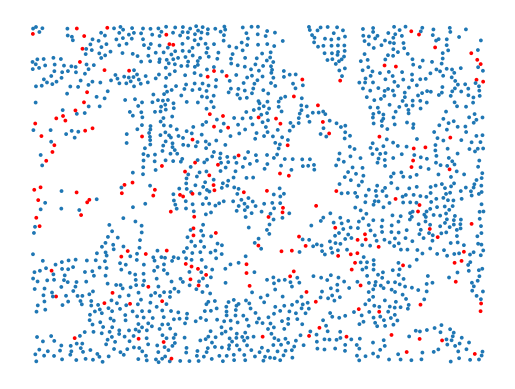

In [11]:
sc.pl.embedding(
    adata_stformer[(adata_stformer.obs['misprediction'].isin([ct, 'Mispredicted']))],
    basis='spatial',           
    color='misprediction',
    size=30,                  
    palette=['#1f77b4', '#FF0000'],          
    frameon=False,
    title='',
    legend_loc='',
    show=False,
)

plt.savefig('spatial_Acinar1_4M-niche20_prediction_fov52.pdf', bbox_inches='tight', pad_inches=0)

/home/shcao/miniconda3/envs/stformer/lib/python3.11/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/shcao/miniconda3/envs/stformer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/shcao/miniconda3/envs/stformer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


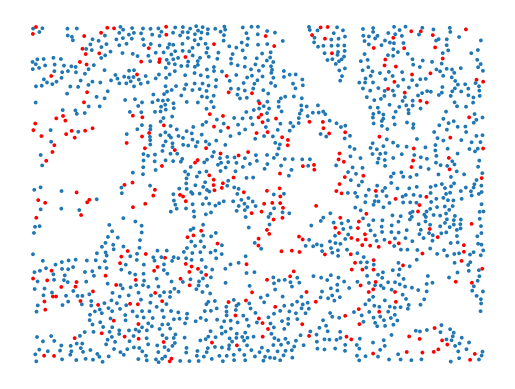

In [12]:
sc.pl.embedding(
    adata_scf[(adata_scf.obs['misprediction'].isin([ct, 'Mispredicted']))],
    basis='spatial',          
    color='misprediction',
    size=30,                  
    palette=['#1f77b4', '#FF0000'],           
    frameon=False,
    title='',
    legend_loc='',
    show=False,
)

plt.savefig('spatial_Acinar1_scf_prediction_fov52.pdf', bbox_inches='tight', pad_inches=0)

/home/shcao/miniconda3/envs/stformer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/shcao/miniconda3/envs/stformer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


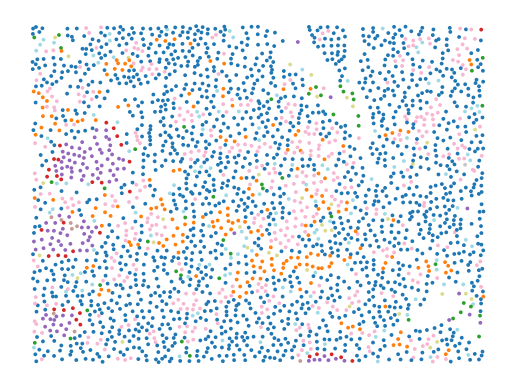

In [13]:
sc.pl.embedding(
    adata_stformer,
    basis='spatial',           
    color='cell_type',
    size=30,                  
    palette='tab20',          
    # title='Cell Type Spatial Distribution',
    # legend_fontsize=10,
    # xlabel='',            
    # ylabel='',
    frameon=False,
    title='',
    legend_loc='',
    show=False,
)

plt.savefig('spatial_celltype_fov52.pdf', bbox_inches='tight', pad_inches=0)